In [1]:
import math
import numpy as np
import random
from scipy.stats import norm

def fct_a(t):
    ts = norm.rvs(loc=t, scale=2)
    return math.sin(((ts+20000)**1.04)/39) + 3 + norm.rvs(loc=0, scale=0.2)

def fct_b(t):
    ts = norm.rvs(loc=t, scale=8)
    return math.sin(((ts+100000)**0.98)/32 + 1)/6 + norm.rvs(loc=0, scale=0.1)

def fct_c(t):
    ts = norm.rvs(loc=t, scale=4)
    return fct_a(ts)*fct_b(ts) + norm.rvs(loc=0, scale=0.4)    

In [2]:
t_dataset = np.arange(0, 65536, 1) 
c_dataset = np.asarray([fct_c(t) for t in t_dataset])

d = 0
d_list = []
for c in c_dataset:
    d += c
    d_list.append(d)
d_dataset = np.asarray(d_list)

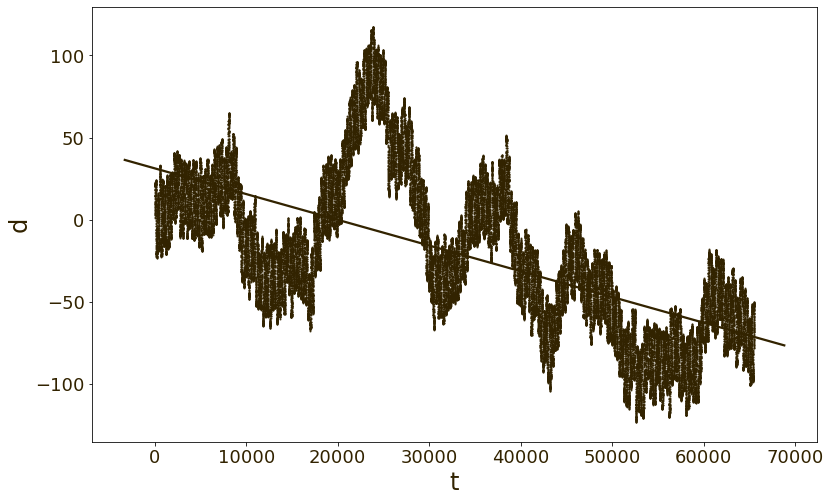

In [3]:
import seaborn as sbn
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
fig.set_size_inches(13, 8)
plt.xticks(fontsize=18, color="#322300")
plt.yticks(fontsize=18, color="#322300")
ax.set_xlabel("t", fontsize=24, color="#322300")
ax.set_ylabel("d", fontsize=24, color="#322300")

sbn.regplot(x=t_dataset, y=d_dataset, color='#322300', order=1, \
            scatter_kws={'s':1}, ci=None, truncate=False)

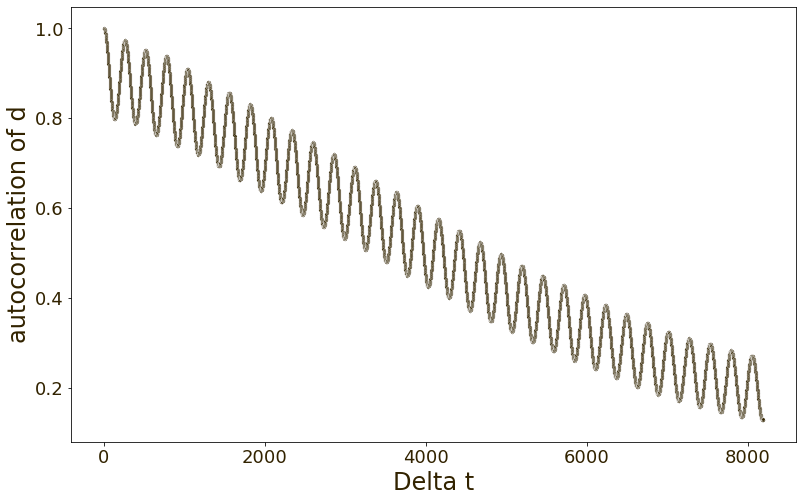

In [4]:
import statsmodels
import statsmodels.tsa
import statsmodels.tsa.stattools

aut = statsmodels.tsa.stattools.acf(d_dataset, nlags=8192)

fig, ax = plt.subplots()
fig.set_size_inches(13, 8)
plt.xticks(fontsize=18, color="#322300")
plt.yticks(fontsize=18, color="#322300")
ax.set_xlabel("Delta t", fontsize=24, color="#322300")
ax.set_ylabel("autocorrelation of d", fontsize=24, color="#322300")

sbn.scatterplot(x=np.arange(0, aut.size, 1), y=aut, color="#322300", s=10)

In [5]:
# center and remove tendency from the d dataset
#
import numpy as np
import statsmodels.api as sm

t_array = sm.add_constant(t_dataset)
linear_fit = sm.OLS(d_dataset, t_array).fit()

print("Fit:\n", linear_fit.summary())
print("Fit params:", linear_fit.params)

d_dataset_stationary = [d_dataset[t] - (linear_fit.params[1]*t + linear_fit.params[0]) \
                        for t in range(d_dataset.size)]

Fit:
                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.390
Model:                            OLS   Adj. R-squared:                  0.390
Method:                 Least Squares   F-statistic:                 4.186e+04
Date:                Mon, 21 Aug 2023   Prob (F-statistic):               0.00
Time:                        15:57:56   Log-Likelihood:            -3.2970e+05
No. Observations:               65536   AIC:                         6.594e+05
Df Residuals:                   65534   BIC:                         6.594e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         31.2864      0.289    108.128   

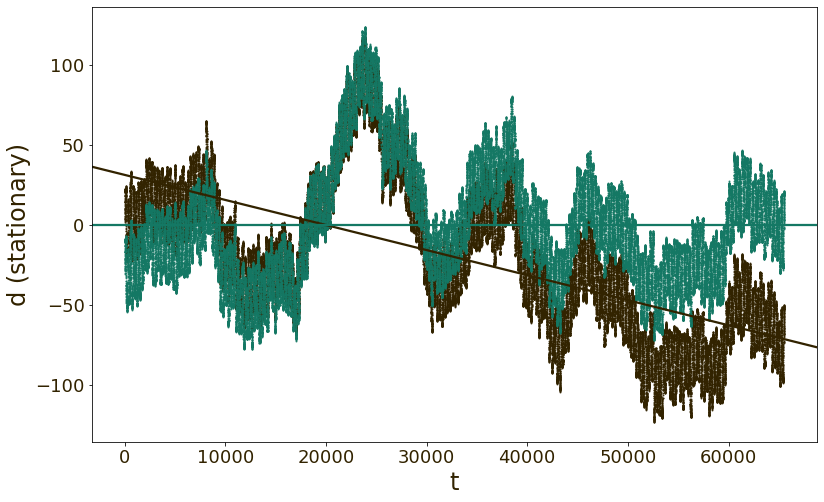

In [6]:
fig, ax = plt.subplots()
fig.set_size_inches(13, 8)
plt.xticks(fontsize=18, color="#322300")
plt.yticks(fontsize=18, color="#322300")
ax.set_xlabel("t", fontsize=24, color="#322300")
ax.set_ylabel("d (stationary)", fontsize=24, color="#322300")

sbn.regplot(x=t_dataset, y=d_dataset, color='#322300', order=1, \
            scatter_kws={'s':1}, ci=None, truncate=False)
sbn.regplot(x=t_dataset, y=d_dataset_stationary, color='#147864', order=1, \
            scatter_kws={'s':1}, ci=None, truncate=False)

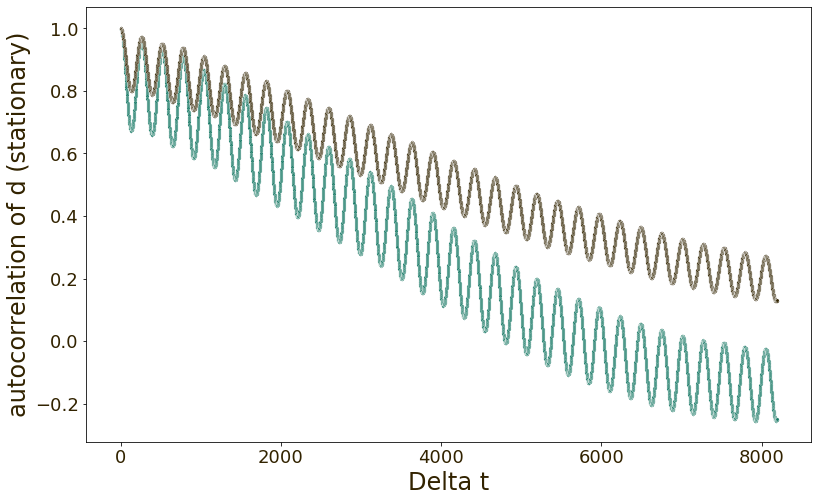

In [7]:
autst = statsmodels.tsa.stattools.acf(d_dataset_stationary, nlags=8192)

fig, ax = plt.subplots()
fig.set_size_inches(13, 8)
plt.xticks(fontsize=18, color="#322300")
plt.yticks(fontsize=18, color="#322300")
ax.set_xlabel("Delta t", fontsize=24, color="#322300")
ax.set_ylabel("autocorrelation of d (stationary)", fontsize=24, color="#322300")

sbn.scatterplot(x=np.arange(0, autst.size, 1), y=autst, color="#147864", s=10)
sbn.scatterplot(x=np.arange(0, aut.size, 1), y=aut, color="#322300", s=10)